# Def:

Embedding is a learned representation for data where similar data points are mapped close together in a Low-dimensional space.

[Click Here For Embedding Projector](https://projector.tensorflow.org/) See videos if not working

# Types of embeddings
1. Word Embeddings (e.g., Word2Vec, GloVe, FastText).
2. Sentence and document embeddings (e.g., BERT, RoBERTa). 
3. Image Embedding
and so on... 

## Types of Word Embeddings (Word2Vec)

1. Continuous Bag of Words (CBOW) - predicts the word by surrounding words
2. Skip-gram - predicts the surrounding words by a word 

### What is Vectors?

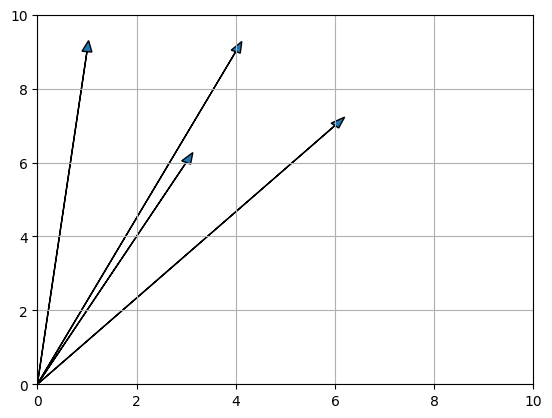

In [179]:
import matplotlib.pyplot as plt
vectors = [[1, 9], [3, 6], [6, 7], [4, 9]]
for vector in vectors:
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.2, head_length=0.3)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.show()


### Let's Code

In [180]:
with open("text.txt", "r") as f:
    content = f.read()


In [181]:
content = [sentences for sentences in content.split("\n")]
content

['Pragateesh Loves deepLearning',
 'Pragateesh is good at deepLearning ',
 'Manikandan and Pragateesh studied deepLearning',
 'Nawfal and Pragateesh studied deepLearning',
 'sathiesh and Pragateesh studied deepLearning',
 'Pragateesh know about transformers',
 'sathiesh know about transformers',
 'Manikandan know about transformers',
 'Pragateesh friends are Manikandan , sathiesh , Nawfal , Gowsi , prakash , Sam',
 'Manikandan friends are Pragateesh , sathiesh , Nawfal , Gowsi , prakash , Sam',
 'sathiesh friends are Pragateesh , Manikandan , Nawfal , Gowsi , prakash, Sam',
 'Nawfal friends are Pragateesh , sathiesh , Manikandan , Gowsi , prakash , Sam',
 'Gowsi friends are Pragateesh , sathiesh , Manikandan , Nawfal , prakash , Sam',
 'prakash friends are Pragateesh , sathiesh , Manikandan , Nawfal , Gowsi , Sam',
 'sam friends are Pragateesh , sathiesh , Manikandan , Nawfal , prakash , Gowsi',
 'Manikandan oftens gets Beat by HOD',
 'Pragateesh Loves deepLearning',
 'prakash oftens g

In [182]:
# remove stopping words from the content 
stopping_words = ["a", "an", "the", "in", "on", "at", "of", "by", "I", "you", "we", "is", "are", "am", "gets", "oftens", ",", ".", "to", "and", "for", "not", "with", "it", "this", "that", "from", "as", "are", "was", "were", "will", "would", "should", "could", "can", "may", "might", "shall", "do", "does", "did", "has", "have", "had", "been", "being", "my", "your", "his", "her", "our", "their", "its", "me", "him", "us", "them", "mine", "yours", "his", "hers", "ours", "theirs", "myself", "yourself", "himself", "herself", "itself", "ourselves", "themselves", "what", "who", "whom", "whose", "which", "where", "when", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn", "wasn", "weren", "won", "wouldn", "here", "there", "when", "where", "why", "how", "which", "what", "who", "whom", "whose", "whichever", "whoever", "whomever", "whatever", "whenever", "wherever", "however", "whyever", "all", "another", "any", "anybody", "anyone", "anything", "both", "each", "either", "everybody", "everyone", "everything", "few", "he", "her", "hers", "herself", "him", "him"]
pure_content = []
for sentence in content:
    temp = []
    for words in sentence.lower().split():  # convert all words to lower case
        if words not in stopping_words:
            temp.append(words)
    pure_content.append(temp)

print(pure_content)

[['pragateesh', 'loves', 'deeplearning'], ['pragateesh', 'good', 'deeplearning'], ['manikandan', 'pragateesh', 'studied', 'deeplearning'], ['nawfal', 'pragateesh', 'studied', 'deeplearning'], ['sathiesh', 'pragateesh', 'studied', 'deeplearning'], ['pragateesh', 'know', 'about', 'transformers'], ['sathiesh', 'know', 'about', 'transformers'], ['manikandan', 'know', 'about', 'transformers'], ['pragateesh', 'friends', 'manikandan', 'sathiesh', 'nawfal', 'gowsi', 'prakash', 'sam'], ['manikandan', 'friends', 'pragateesh', 'sathiesh', 'nawfal', 'gowsi', 'prakash', 'sam'], ['sathiesh', 'friends', 'pragateesh', 'manikandan', 'nawfal', 'gowsi', 'prakash,', 'sam'], ['nawfal', 'friends', 'pragateesh', 'sathiesh', 'manikandan', 'gowsi', 'prakash', 'sam'], ['gowsi', 'friends', 'pragateesh', 'sathiesh', 'manikandan', 'nawfal', 'prakash', 'sam'], ['prakash', 'friends', 'pragateesh', 'sathiesh', 'manikandan', 'nawfal', 'gowsi', 'sam'], ['sam', 'friends', 'pragateesh', 'sathiesh', 'manikandan', 'nawfal'

### Bigrams

In [183]:
bigrams = []
for words_list in pure_content:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])
            

print(bigrams)

[['pragateesh', 'loves'], ['loves', 'pragateesh'], ['pragateesh', 'deeplearning'], ['deeplearning', 'pragateesh'], ['loves', 'deeplearning'], ['deeplearning', 'loves'], ['pragateesh', 'good'], ['good', 'pragateesh'], ['pragateesh', 'deeplearning'], ['deeplearning', 'pragateesh'], ['good', 'deeplearning'], ['deeplearning', 'good'], ['manikandan', 'pragateesh'], ['pragateesh', 'manikandan'], ['manikandan', 'studied'], ['studied', 'manikandan'], ['manikandan', 'deeplearning'], ['deeplearning', 'manikandan'], ['pragateesh', 'studied'], ['studied', 'pragateesh'], ['pragateesh', 'deeplearning'], ['deeplearning', 'pragateesh'], ['studied', 'deeplearning'], ['deeplearning', 'studied'], ['nawfal', 'pragateesh'], ['pragateesh', 'nawfal'], ['nawfal', 'studied'], ['studied', 'nawfal'], ['nawfal', 'deeplearning'], ['deeplearning', 'nawfal'], ['pragateesh', 'studied'], ['studied', 'pragateesh'], ['pragateesh', 'deeplearning'], ['deeplearning', 'pragateesh'], ['studied', 'deeplearning'], ['deeplearni

### Create one Hot encoding

In [184]:
total_words = []
for words_list in pure_content:
    for words in words_list:
        if words not in total_words:
            total_words.append(words)

print(total_words)
print("The total content is: ")
print(len(total_words))


['pragateesh', 'loves', 'deeplearning', 'good', 'manikandan', 'studied', 'nawfal', 'sathiesh', 'know', 'about', 'transformers', 'friends', 'gowsi', 'prakash', 'sam', 'prakash,', 'beat', 'hod', 'scold', 'ui', 'specialist', 'knows', 'well', 'creates', 'many', 'cars', 'bikes', 'repairing', 'driving', 'great', 'mechanic', 'love', 'be']
The total content is: 
33


In [185]:
words_dict = {}

counter = 0
for word in total_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'pragateesh': 0, 'loves': 1, 'deeplearning': 2, 'good': 3, 'manikandan': 4, 'studied': 5, 'nawfal': 6, 'sathiesh': 7, 'know': 8, 'about': 9, 'transformers': 10, 'friends': 11, 'gowsi': 12, 'prakash': 13, 'sam': 14, 'prakash,': 15, 'beat': 16, 'hod': 17, 'scold': 18, 'ui': 19, 'specialist': 20, 'knows': 21, 'well': 22, 'creates': 23, 'many': 24, 'cars': 25, 'bikes': 26, 'repairing': 27, 'driving': 28, 'great': 29, 'mechanic': 30, 'love': 31, 'be': 32}


In [186]:
import numpy as np

onehot_data = np.zeros((len(total_words), len(total_words)))

for i in range(len(total_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in total_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

pragateesh : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
loves : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
deeplearning : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
good : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
manikandan : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
studied : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
nawfal : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sathiesh : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
know : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.

### Dataset Creation

In [187]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

In [188]:
print(X[0], ":", Y[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.] : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [189]:
def get_key(val):
    for key, value in onehot_dict.items():
        if np.array_equal(val, value):
            return key
    return "Key doesn't exist"

print(get_key(X[0]), ":", get_key(Y[0]))

pragateesh : loves


### Most interesting part.. Let's Build Neural Nets

In [190]:
import warnings 
warnings.filterwarnings("ignore")

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])



In [192]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [193]:
model.build(input_shape=(None, X.shape[1]))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 68        
                                                                 
 dense_15 (Dense)            (None, 33)                99        
                                                                 
Total params: 167 (668.00 Byte)
Trainable params: 167 (668.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [199]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in total_words:
    word_embeddings[word] = weights[words_dict[word]]

In [200]:
print(word_embeddings)

{'pragateesh': array([-0.23091474, -1.4490732 ], dtype=float32), 'loves': array([-0.60963804, -4.190545  ], dtype=float32), 'deeplearning': array([-0.6112178, -2.2262642], dtype=float32), 'good': array([0.51078767, 0.83277035], dtype=float32), 'manikandan': array([ 0.11916244, -0.9120357 ], dtype=float32), 'studied': array([-0.22558464, -3.9978106 ], dtype=float32), 'nawfal': array([ 0.07280162, -0.00591051], dtype=float32), 'sathiesh': array([ 0.11750665, -1.17384   ], dtype=float32), 'know': array([-1.37957  , -1.0052812], dtype=float32), 'about': array([-1.2221752 , -0.08603618], dtype=float32), 'transformers': array([-1.3837171, -1.0721347], dtype=float32), 'friends': array([ 2.089624 , -1.5843811], dtype=float32), 'gowsi': array([ 1.6639732 , -0.75561094], dtype=float32), 'prakash': array([1.4386816 , 0.60226107], dtype=float32), 'sam': array([ 0.5234068 , -0.29639614], dtype=float32), 'prakash,': array([ 1.7614925, -2.2785513], dtype=float32), 'beat': array([3.2367277, 0.6674066]

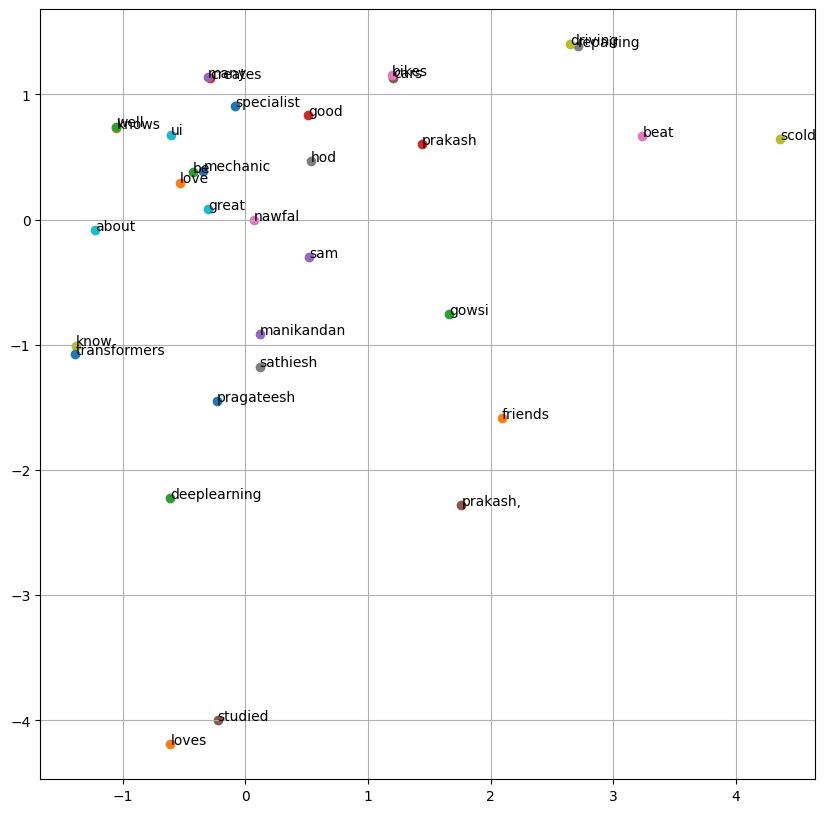

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
plt.grid(True)
plt.show()

### FAQ

1. Is it supervised are unsupervised